###### NIANG Abdou

# **IRIS DATASET**


In [1097]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Chargement de Iris dataset de sklearn

In [1098]:
from sklearn import datasets
iris_dataset = datasets.load_iris()


*L’objet iris_dataset renvoyé par load_iris est un objet de type Bunch, qui est très semblable à un dictionnaire.*

*• Il contient des clefs et des valeurs associées.*



In [1099]:
print("Clés de Iris_dataset sont : \n{}".format(iris_dataset.keys()))

Clés de Iris_dataset sont : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


*La clé ***'data'*** regroupe l'ensemble des données*

*La valeur de la clef ***DESCR*** est une courte description du jeu de données. On peut en examiner le début de la façon suivante :*


In [1100]:
print("Shape of data : {}".format(iris_dataset['data'].shape))

Shape of data : (150, 4)


In [1101]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

###  1. **Type de problème d'apprentissage :**

In [1102]:
print('Les noms de labels sont : {}'.format(iris_dataset['target_names']))


Les noms de labels sont : ['setosa' 'versicolor' 'virginica']


*L'objectif est de prédire le label de classe en le choisissant parmi ['setosa','versicolor','virginica']*

**Conclusion : Donc  c'est `une classification multi-classes`**



### 2. **Domaine des instances $\ X$ et ensemble des étiquettes $\ Y$**

In [1103]:
print(' Les étiquettes sont :\n {}'.format(iris_dataset['target']))

 Les étiquettes sont :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Setosa codé 0 , versicolor codé en 1 et virginica codé 2

Donc **$\ Y$ = {0,1,2}** 

In [1104]:
print( 'les premières colonnes de data sont : {}'.format(iris_dataset['data'][0:5]))

les premières colonnes de data sont : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Donc **$\ X$ = $\ R^{4}$ ou $\ R$ corps des réels**

##### **3. On peut maintenant transformer les données en une `DataFrame` de la librairie `pandas`**

In [1105]:
X = pd.DataFrame(iris_dataset['data'], columns=['sepal length','sepal width', 'petal length','petal width'])

y = pd.Series(iris_dataset['target'])

* ##### **Division des données en ensemble d'apprentissage (100) et ensemble de test(50),Pourquoi est-il important d'utiliser l'argument par défaut `shuffle=True`?**

In [1106]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test =train_test_split(X,y, train_size= 0.67, shuffle=True,random_state=0)  #0.67 proportion du train dataset

In [1107]:
print(X_train.shape)
print(X_test.shape)

(100, 4)
(50, 4)


* ##### **Pourquoi shuffle=True ?**

**Avec `shuffle=True` on divise les données en train et test de facon aléatoire. Parce que autrement les 100 premieres observations vont au train dataset et le reste au test dataset.**


* *Remarque : J'ai rajouté random_state = 0 pour permettre à la fonction train_test_split de réordonner les données  et d’éviter que toutes les données d’une classe soient exclues de l’ensemble d’apprentissage par exemple.*


##### **4. Sélectionnez les 2 dimensions `sepal width` et `petal length` du domaine des instances et visualisez les données en les colorant en fonction des classes.**

In [1108]:
X[['sepal width','petal length']].head()

,sepal width,petal length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


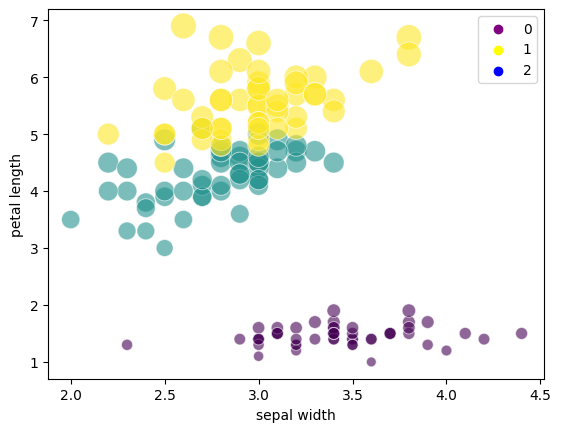

In [1109]:
import seaborn as sns
sns.scatterplot(X, x='sepal width', y='petal length',hue=iris_dataset.target, palette=['purple','yellow','blue'], alpha=0.6,s=50*X['petal length'],c=y)
plt.show()

##### ` Les trois classes ne sont pas très bien séparées en particulier les versicolor et virginica`

##### **5. Recodez les classes pour avoir un problème de classification binaire avec les iris `setosa` d'un côté (étiquette `-1`) et les iris `versicolor` et `virignica` de l'autre (étiquette `1`).** 


In [1110]:
y=y.replace([0, 1,2], [-1, 1,1])
y=pd.DataFrame(y)
#y1.head()

 * **Visualisation** : 

In [1111]:
X['encoded values']= y
X.head()


,sepal length,sepal width,petal length,petal width,encoded values
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1


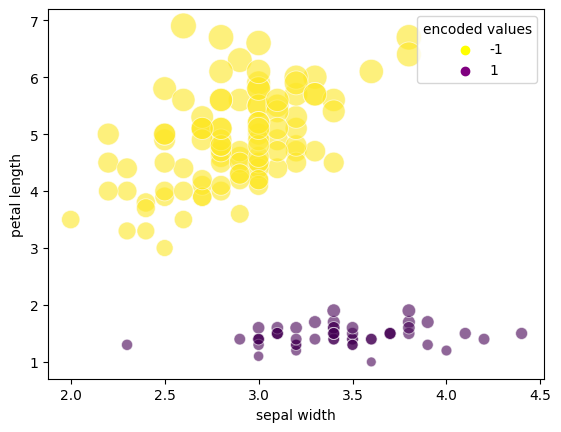

In [1112]:
sns.scatterplot(data=X, x=X['sepal width'], y=X['petal length'],alpha=0.6,hue= 'encoded values',s=50*X['petal length'],palette=['yellow','purple'], c=y)
plt.show()

##### ``• Le graphique obtenu permet de voir que les deux classes peuvent être bien séparées en utilisant les mesures de sépales et de pétales.``

##### • ``Ceci signifie qu’un algorithme de Machine Learning devrait être à même d’apprendre à les séparer.**``


#### **6. Utilisez l'algorithme `sklearn.linear_model.Perceptron` pour séparer les 2 classes dans le sous-domaine à 2 dimensions sélectionné dans la question 3. Calculez l'erreur empirique et l'erreur en généralisation. Le résultat est-il surprenant ? Pourquoi ?**

En utilisant le code suivant, il est possible de visualiser la frontière de décision d'un classifieur `clf` pour des données en 2 dimensions.

In [1113]:
def visualize(clf,X1,X2,y):
    """ Permet de visualiser la frontière de décision du classificateur clf.
                
    Parameters
    ----------
    clf : 
        Le classificateur à visualiser
    X1 : 
        La première dimension des données
    X2 :
        La seconde dimension des données
    y :
        Les étiquettes des exemples
    
    """     
    # Plotting decision regions
    x_min, x_max = np.array(X1).min() - 1, np.array(X1).max() + 1
    y_min, y_max = np.array(X2).min() - 1, np.array(X2).max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X1, X2, c=y, s=20, edgecolor='k')

    plt.show()

In [1114]:
subset = ['sepal width','petal length']  #j'aurais dû faire ca depuis le début

In [1115]:
from sklearn.linear_model import Perceptron 
#instancier un objet perceptron
clf= Perceptron()

#Entrainons le modéle sur les données d'entrainement et etiquettes d'entrainement: 

clf.fit(X_train[subset], y_train)

Perceptron()

In [1120]:
y_pred = clf.predict(X_test[subset])

In [1125]:
print(" Score de l'ensemble de test: {}".format(clf.score(X_test[subset], y_test)))

 Score de l'ensemble de test: 0.6


In [ ]:
from sklearn.metrics import zero_one_loss
print("Erreur empirique      : {:.2}".format( zero_one_loss(y_train, clf.predict(X_train[subset])))) 
print("Erreur en généralisation  : {:.2}".format(zero_one_loss(y_test, clf.predict(X_test[subset]))))

Erreur empirique      : 0.29
Erreur en généralisation  : 0.22


##### On pouvait s'attendre à des erreurs plus élevées compte tenu du score de notre modèle. Mais en visualisant les données ( voir le ci-dessous ), la frontière de décision est très claire et sépare notre sous domaine de facon claire.

In [ ]:
y_train=y_train.replace([0, 1,2], [-1, 1,1])
y_train=pd.DataFrame(y_train)

y_test=y_test.replace([0, 1,2], [-1, 1,1])
y_test=pd.DataFrame(y_test)

* #### **Visualisation frontière de décision**

C:\Users\abdou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


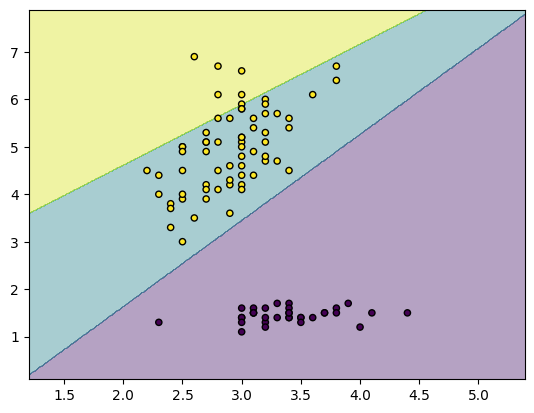

In [ ]:

visualize(clf, X_train['sepal width'], X_train['petal length'], y_train)